In [36]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
df_ajustado = pd.read_csv('Datos/Transformados/limpio.csv')

**Cambios al dia**

C:\Users\lande\AppData\Local\Temp\ipykernel_25696\3640970676.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rentabilidades_diarias = df_ajustado.pct_change() * 100
C:\Users\lande\AppData\Local\Temp\ipykernel_25696\3640970676.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


C:\Users\lande\AppData\Local\Temp\ipykernel_25696\3640970676.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rentabilidades_diarias = df_ajustado.pct_change() * 100
C:\Users\lande\AppData\Local\Temp\ipykernel_25696\3640970676.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


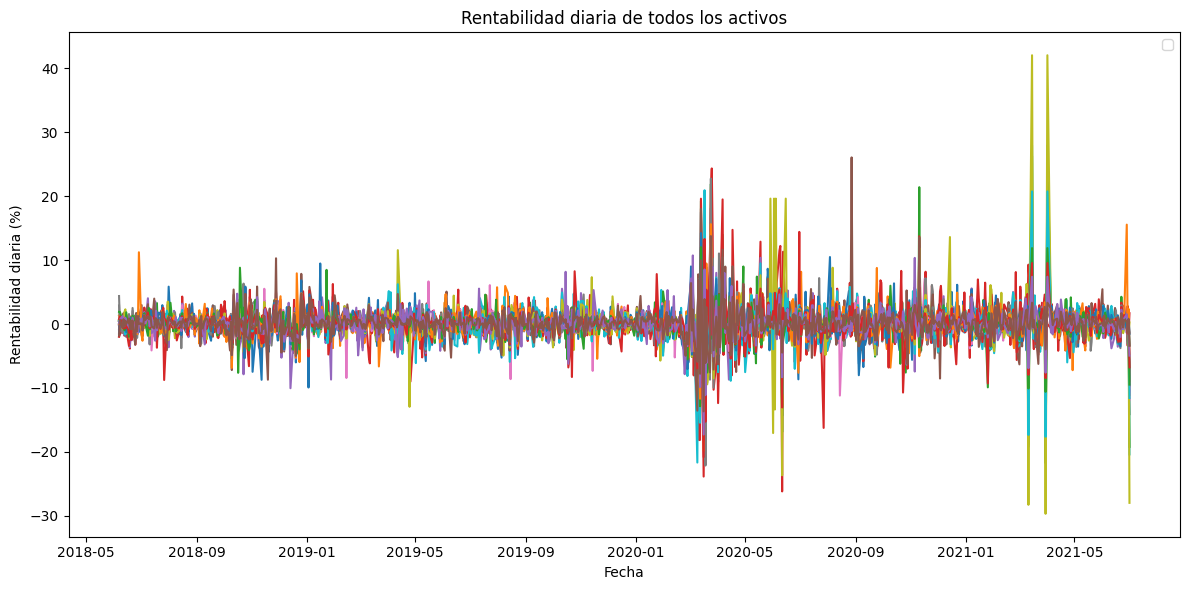

In [46]:
rentabilidades_diarias = df_ajustado.pct_change() * 100
plt.figure(figsize=(12,6))
for col in df_ajustado.columns:
    plt.plot(df_ajustado.index, rentabilidades_diarias[col])
plt.title('Rentabilidad diaria de todos los activos')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad diaria (%)')
plt.legend()
plt.tight_layout()
plt.show()

Define la función de **rentabilidad anualizada**:
$r_{periodo} = (1+r)^n -1$

In [47]:
def rentabilidad_anualizada(r_diaria, n=252):
    return (np.prod(1 + r_diaria) ** (n / len(r_diaria))) - 1

In [48]:
resultados = {}
for col in df_ajustado.columns:
    serie = df_ajustado[col].dropna()
    rent_diaria = rentabilidades_diarias[col].loc[serie.index].dropna()
    if len(serie) > 1 and len(rent_diaria) > 0:
        rent_media = rent_diaria.mean()
        rent_activa = (serie.iloc[-1] - serie.iloc[0]) / serie.iloc[0]
        r_diaria_decimal = rent_diaria / 100
        rent_anual = rentabilidad_anualizada(r_diaria_decimal, 252)
        resultados[col] = {
            'Rentabilidad media (%)': rent_media,
            'Rentabilidad activa (%)': rent_activa*100,
            'Rentabilidad anualizada (%)': rent_anual*100}
    else:
        resultados[col] = {'Rentabilidad media (%)': np.nan, 'Rentabilidad activa (%)': np.nan, 'Rentabilidad anualizada (%)': np.nan}
df_resultados = pd.DataFrame(resultados).T
df_resultados

,Rentabilidad media (%),Rentabilidad activa (%),Rentabilidad anualizada (%)
AAPL,0.151001,176.665410,38.011526
AMGN,0.042090,17.419227,5.346018
AXP,0.091874,57.250985,15.813720
BA,0.009389,-35.480139,-13.248109
CAT,0.055722,27.513418,7.998367
CRM,0.104364,78.849011,20.750108
CSCO,0.032412,6.420310,2.038651
CVX,0.000314,-27.750733,-10.005441
DIS,0.091394,71.085651,19.024630
DOW,0.071821,0.689717,0.299088


In [49]:
vol_diaria = rentabilidades_diarias.std()
vol_anual = vol_diaria * np.sqrt(252)
df_volatilidad = pd.DataFrame({'Volatilidad diaria': vol_diaria, 'Volatilidad anualizada': vol_anual})
df_volatilidad

,Volatilidad diaria,Volatilidad anualizada
AAPL,2.147329,34.087790
AMGN,2.049804,32.539630
AXP,2.585485,41.043307
BA,3.565014,56.592846
CAT,2.240018,35.559181
CRM,2.418767,38.396728
CSCO,2.179533,34.599010
CVX,2.855413,45.328281
DIS,2.096215,33.276389
DOW,3.715908,58.988204


**Volatilidad anualizada**: $\sigma*\sqrt(n)$

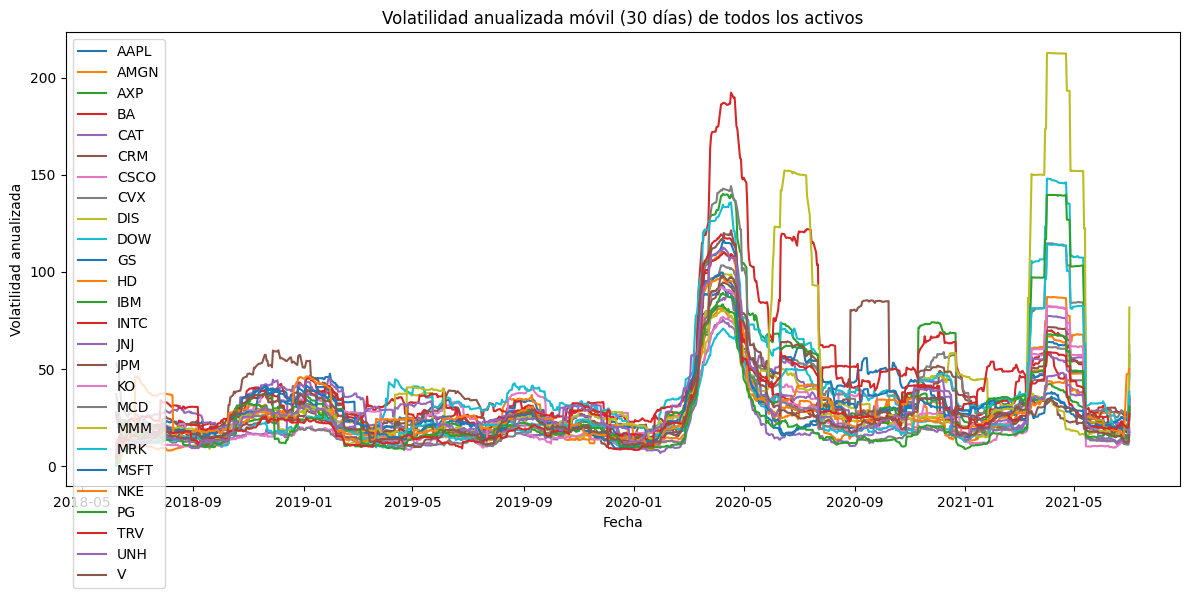

In [50]:
vol_30d = rentabilidades_diarias.rolling(window=30, min_periods=1).std() * np.sqrt(252)
plt.figure(figsize=(12,6))
for col in df_ajustado.columns:
    plt.plot(df_ajustado.index, vol_30d[col], label=col)
plt.title('Volatilidad anualizada móvil (30 días) de todos los activos')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad anualizada')
plt.legend()
plt.tight_layout()
plt.show()

**Ratio de Sharpe**: $S_h = \frac{r-r_f}{\sigma}$

In [51]:
rf = 0.025
sharpe = {}
for col in df_ajustado.columns:
    vol_anual_col = vol_anual[col] if col in vol_anual else np.nan
    rent_anual_col = df_resultados.loc[col, 'Rentabilidad anualizada (%)'] if col in df_resultados.index else np.nan
    if not np.isnan(vol_anual_col) and not np.isnan(rent_anual_col) and vol_anual_col != 0:
        sharpe[col] = (rent_anual_col/100 - rf) / vol_anual_col
    else:
        sharpe[col] = np.nan
df_sharpe = pd.DataFrame({'Sharpe': sharpe})
df_sharpe

,Sharpe
AAPL,0.010418
AMGN,0.000875
AXP,0.003244
BA,-0.002783
CAT,0.001546
CRM,0.004753
CSCO,-0.000133
CVX,-0.002759
DIS,0.004966
DOW,-0.000373


$Drawdown_i = \frac{p_i}{p_{max}}$

$Max-drawdown = min(drawdown_i)_n$

In [52]:
max_drawdown = {}
for col in df_ajustado.columns:
    serie = df_ajustado[col].dropna()
    if len(serie) > 1:
        max_close = serie.cummax()
        drawdown = serie / max_close - 1
        max_drawdown[col] = drawdown.min()
    else:
        max_drawdown[col] = np.nan
df_drawdown = pd.DataFrame({'Max Drawdown': max_drawdown})
df_drawdown

,Max Drawdown
AAPL,-0.383931
AMGN,-0.250658
AXP,-0.496385
BA,-0.784372
CAT,-0.419463
CRM,-0.357158
CSCO,-0.428079
CVX,-0.575843
DIS,-0.434450
DOW,-0.631552


C:\Users\lande\AppData\Local\Temp\ipykernel_25696\348396274.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


C:\Users\lande\AppData\Local\Temp\ipykernel_25696\348396274.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


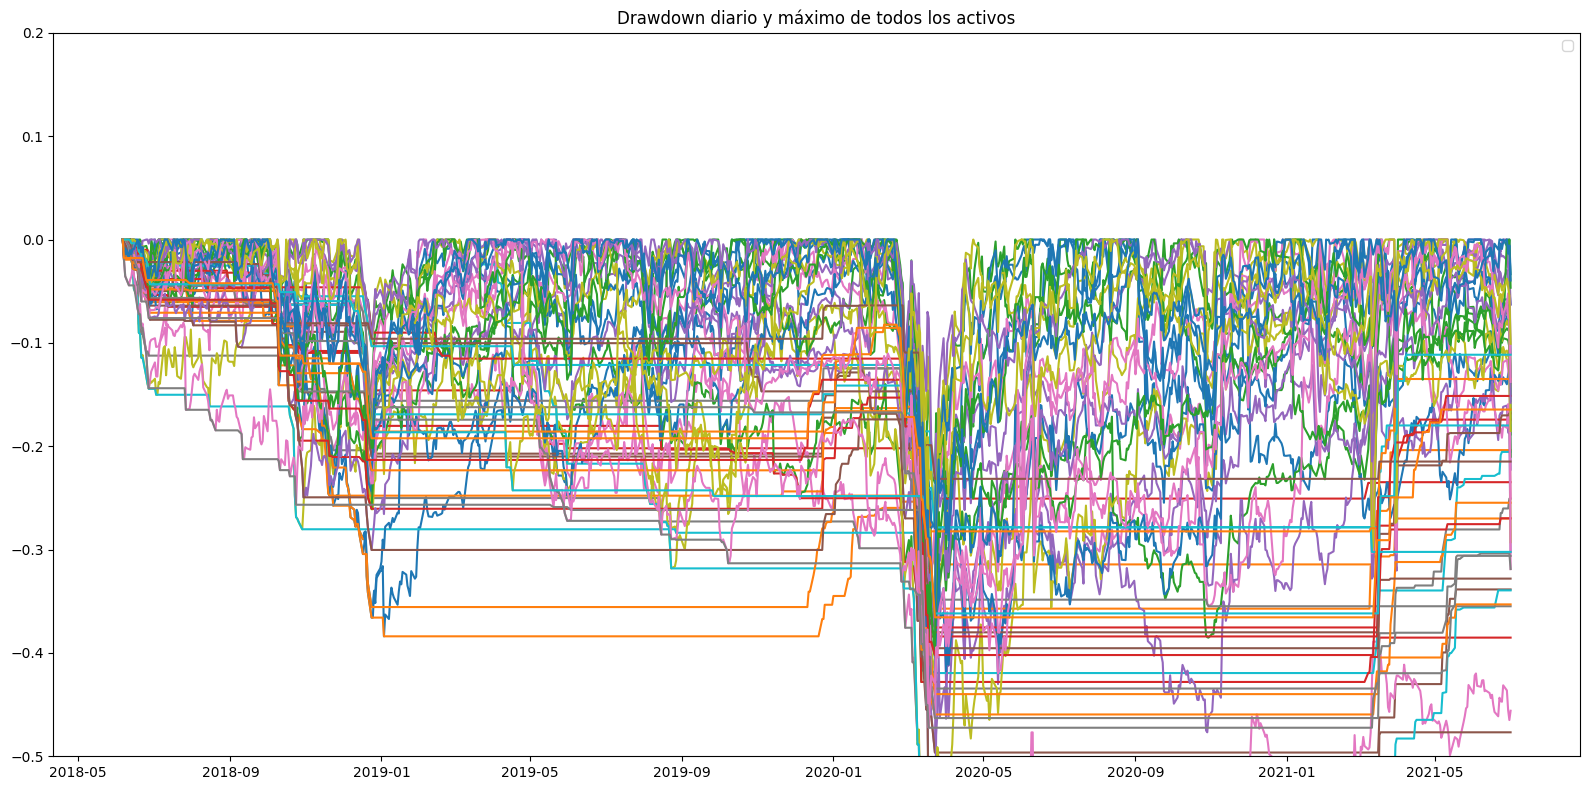

In [53]:
fig, ax = plt.subplots(figsize=(16, 8))
for col in df_ajustado.columns:
    serie = df_ajustado[col].dropna()
    if len(serie) > 1:
        max_close = serie.cummax()
        daily_drawdown = serie / max_close - 1
        max_daily_drawdown = daily_drawdown.rolling(window=252, min_periods=1).min()
        ax.plot(serie.index, daily_drawdown)
        ax.plot(serie.index, max_daily_drawdown)
ax.set_ylim(-0.5, 0.2)
ax.legend()
plt.title('Drawdown diario y máximo de todos los activos')
plt.tight_layout()
plt.show()

In [54]:
for idx, row in df_ajustado.reset_index().iterrows():
    for symbol in df_ajustado.columns:
        valor = row[symbol]
        fecha = pd.to_datetime(row['fecha']) if 'fecha' in row else df_ajustado.index[idx]
        if pd.isna(valor):
            try:
                df_yf = yf.download(symbol, start=fecha, end=fecha + pd.Timedelta(days=1), interval="1d", progress=False)
                if not df_yf.empty:
                    close_val = df_yf['Adj Close'].iloc[0] if 'Adj Close' in df_yf.columns else df_yf['Close'].iloc[0]
                    df_ajustado.at[fecha, symbol] = close_val
            except Exception as e:
                print(f"Error con {symbol} en {fecha.date()}: {e}")
print("Missings en df_ajustado después de imputar con yfinance:", df_ajustado.isna().sum().sum())

C:\Users\lande\AppData\Local\Temp\ipykernel_25696\1599084184.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(symbol, start=fecha, end=fecha + pd.Timedelta(days=1), interval="1d", progress=False)

1 Failed download:
['DOW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-06 00:00:00 -> 2018-06-07 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1528257600, endDate = 1528344000")')

1 Failed download:
['DOW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-06 00:00:00 -> 2018-06-07 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1528257600, endDate = 1528344000")')
C:\Users\lande\AppData\Local\Temp\ipykernel_25696\1599084184.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(symbol, start=fecha, end=fecha + pd.Timedelta(days=1), interval="1d", progress=False)
C:\Users\lande\AppData\Local\Temp\ipyk

C:\Users\lande\AppData\Local\Temp\ipykernel_25696\1599084184.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(symbol, start=fecha, end=fecha + pd.Timedelta(days=1), interval="1d", progress=False)

1 Failed download:
['DOW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-06 00:00:00 -> 2018-06-07 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1528257600, endDate = 1528344000")')

1 Failed download:
['DOW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-06 00:00:00 -> 2018-06-07 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1528257600, endDate = 1528344000")')
C:\Users\lande\AppData\Local\Temp\ipykernel_25696\1599084184.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(symbol, start=fecha, end=fecha + pd.Timedelta(days=1), interval="1d", progress=False)
C:\Users\lande\AppData\Local\Temp\ipyk

KeyboardInterrupt: 